In [146]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np


In [147]:
#read in csv into a pandas dataframe
df = pd.read_csv("ad_table.csv")

In [148]:
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [149]:
df.describe()

,shown,clicked,converted,avg_cost_per_click,total_revenue
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,68299.844444,3056.077069,126.453901,1.373749,1966.517589
std,48884.821409,3783.579969,233.420826,0.754331,3942.018757
min,0.000000,0.000000,0.000000,0.000000,-200.150000
25%,28030.500000,744.000000,18.000000,0.760000,235.470000
50%,54029.000000,1392.000000,41.000000,1.400000,553.300000
75%,97314.500000,3366.500000,103.000000,1.920000,1611.495000
max,192507.000000,20848.000000,1578.000000,4.190000,39623.710000


In [150]:
df.date.unique()
# df.ad.unique()
len(df.ad.unique())

40

In [151]:
#check for null values
df.isnull().values.any()

False

In [7]:
# df.set_index(['date'],inplace=False)
# idx =df.set_index(['date'],inplace=True)
idx=df['date']

In [ ]:
# plt.figure()
# df.plot()
# df.plot(x=df.index,y=df.clicked)
# plt.show()


In [9]:
# columns=['date','converted','clicked','ad']
# df2=pd.DataFrame(df,columns=columns)
# df2.set_index(df2.date,inplace=True)

In [ ]:
# plt.figure()
# df2=df2.head()
# df2.loc[:,['clicked','ad']].plot(kind='bar')
# plt.show()
# fig, ax = plt.subplots()

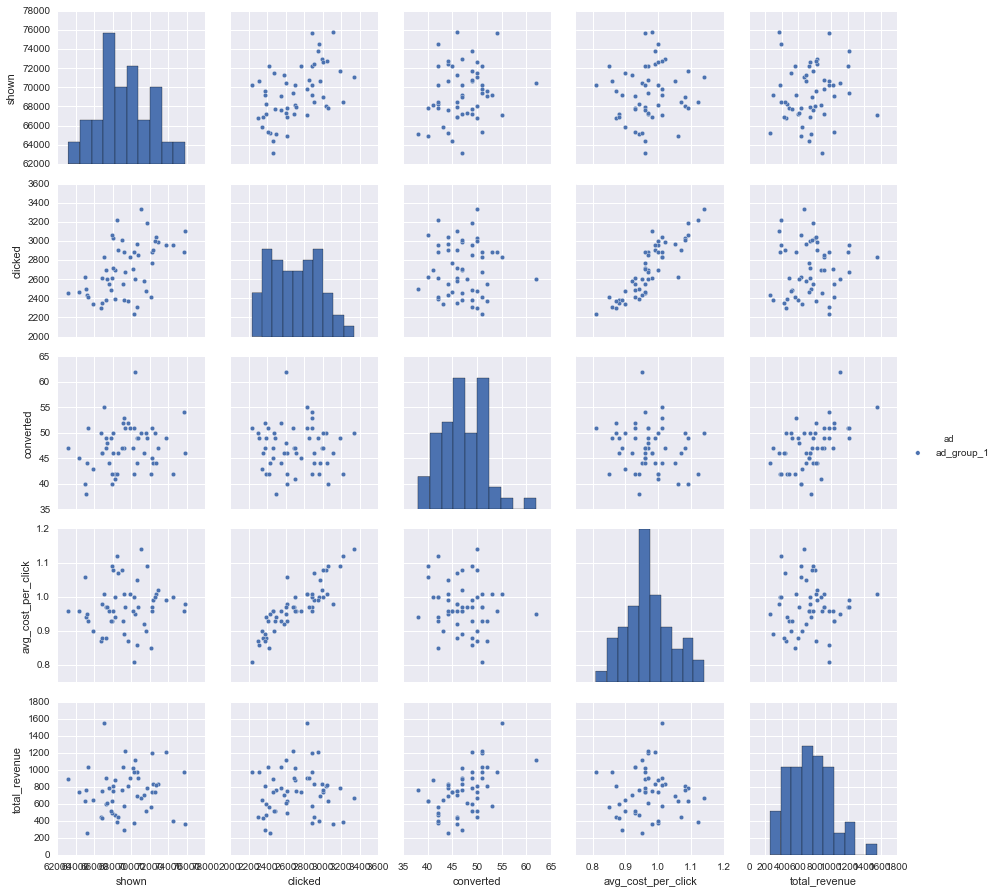

In [152]:
sb.pairplot(df.loc[df['ad'] == 'ad_group_1'].dropna(), hue='ad')


In [67]:
df['CTR']=df.clicked/df.shown*100
df['conversion_rate']=df.converted/df.clicked*100
df['total_cost']=df.avg_cost_per_click*df.clicked
df['ROI']=(df.total_revenue-df.total_cost)/df.total_cost

In [68]:
#grouping data by ad group
by_ad = df.groupby(['ad'])

In [69]:
#Calculate new derived metrics
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,date_int,ad_int,CTR,conversion_rate,total_cost,ROI
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,1,1,3.550556,1.838392,2105.10,-0.695207
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,2,1,3.837174,1.521217,2348.12,-0.677883
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,3,1,3.273515,2.118461,1989.18,-0.511909
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,4,1,4.058216,1.800212,2861.33,-0.682878
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,5,1,3.953891,1.520772,2696.00,-0.673795


In [74]:
#Top ad groups ROI based on mean ROI over the days the ad was shown
by_ad['ROI'].agg(np.mean).sort_values(ascending=False).head(10)

ad
ad_group_31    7.846619
ad_group_2     1.507675
ad_group_16    1.447587
ad_group_14    0.853869
ad_group_27    0.255067
ad_group_36   -0.071266
ad_group_15   -0.091195
ad_group_22   -0.109003
ad_group_13   -0.123185
ad_group_34   -0.216119
Name: ROI, dtype: float64

In [75]:
by_ad['CTR'].agg(np.mean).sort_values(ascending=False).head(10)

ad
ad_group_18    9.899632
ad_group_3     9.498652
ad_group_19    9.418753
ad_group_26    9.097177
ad_group_28    8.919079
ad_group_32    8.778199
ad_group_7     8.737018
ad_group_13    8.563472
ad_group_34    8.425714
ad_group_4     8.289164
Name: CTR, dtype: float64

Get the max metric values for each ad group

In [76]:
by_ad['conversion_rate'].agg(np.mean).sort_values(ascending=False).head(10)

ad
ad_group_2     10.283307
ad_group_13     9.534363
ad_group_12     9.200732
ad_group_16     8.964136
ad_group_34     8.822028
ad_group_31     8.779153
ad_group_14     8.364619
ad_group_18     7.032152
ad_group_5      6.510347
ad_group_4      6.396129
Name: conversion_rate, dtype: float64

In [78]:
by_ad['avg_cost_per_click'].agg(np.mean).sort_values(ascending=True).head(10)

ad
ad_group_9     0.092642
ad_group_31    0.147358
ad_group_35    0.354528
ad_group_27    0.379057
ad_group_17    0.396792
ad_group_16    0.542642
ad_group_2     0.638113
ad_group_25    0.703774
ad_group_14    0.709231
ad_group_36    0.750377
Name: avg_cost_per_click, dtype: float64

# Part 1 evaluations:
I would pick

ad_group_31    
ad_group_2     
ad_group_16    
ad_group_14    
ad_group_27

because they have the highest ROI.
I used ROI because it ultimately answers the business problem of "Is my spend on my ad giving me any positive returns and by how much". The other metrics are more of reporting metrics but do not wholly evaluate the big picture. 

The cons of ROI is that it is a short term returns model and doesnt take into account ads that can probably lead to longer term but higher returns. This is because ROI doesnt look at other important metrics like ad engagement metrics such as CTR or signup rate or retention metrics like stickiness of users (DAU/MAU). 

In [86]:
#extract day number from date and ad group number from ad group to prep for modeling
date_array=[]
year_array=[]
ad_array=[]
for d in df.date:
    date_array.append(datetime.datetime.strptime(d,"%Y-%m-%d").day)
    year_array.append(datetime.datetime.strptime(d,"%Y-%m-%d").year)
for a in df.ad:
    ad_array.append(int(a[9:]))
    
df['date_int'] = date_array
df['ad_int'] = ad_array


In [ ]:
# fig, axs = plt.subplots(1, 1, sharey=True)
# df.loc[df['ad'] == 'ad_group_1'].plot(kind='line', x='date', y='avg_cost_per_click', figsize=(16, 8))
# df.plot(kind='line', x='date', y='avg_cost_per_click', figsize=(16, 8))

In [ ]:
# df.loc[df['ad'] == 'ad_group_1']

New dataframe with ad and date column transfromed into integers

In [ ]:
df.head()

## PART 2
Perform Regression analysis with independent variables 
- x1 = date number and
- x2 = ad group and
- y = ad shown value

Assumptions made are 
- that the variables x1 and x2 are independent
- All variables are normally distributed
- Homoscedasticity (The variance of errors is the same across all levels of the independent variables)
- Linear relationship between dependent and independent variables.

In [91]:
feature_cols = ['date_int','ad_int']
X=df[feature_cols]
y=df.shown
lm=LinearRegression()
lm.fit(X,y)

# print lm.intercept_
# print lm.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict ad shown number based on date number (15) and ad group.

In [85]:
for i in range(1,len(df.ad.unique())+1):
    print "predicting ad shown on Dec 15 for ad group "+ str(i) 
    print round(lm.predict([15,i])[0])


predicting ad shown on Dec 15 for ad group 1
71154.0
predicting ad shown on Dec 15 for ad group 2
71013.0
predicting ad shown on Dec 15 for ad group 3
70872.0
predicting ad shown on Dec 15 for ad group 4
70731.0
predicting ad shown on Dec 15 for ad group 5
70590.0
predicting ad shown on Dec 15 for ad group 6
70449.0
predicting ad shown on Dec 15 for ad group 7
70308.0
predicting ad shown on Dec 15 for ad group 8
70167.0
predicting ad shown on Dec 15 for ad group 9
70026.0
predicting ad shown on Dec 15 for ad group 10
69885.0
predicting ad shown on Dec 15 for ad group 11
69744.0
predicting ad shown on Dec 15 for ad group 12
69603.0
predicting ad shown on Dec 15 for ad group 13
69462.0
predicting ad shown on Dec 15 for ad group 14
69321.0
predicting ad shown on Dec 15 for ad group 15
69180.0
predicting ad shown on Dec 15 for ad group 16
69039.0
predicting ad shown on Dec 15 for ad group 17
68898.0
predicting ad shown on Dec 15 for ad group 18
68757.0
predicting ad shown on Dec 15 for ad 

/Users/jennxf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jennxf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jennxf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

## PART 3

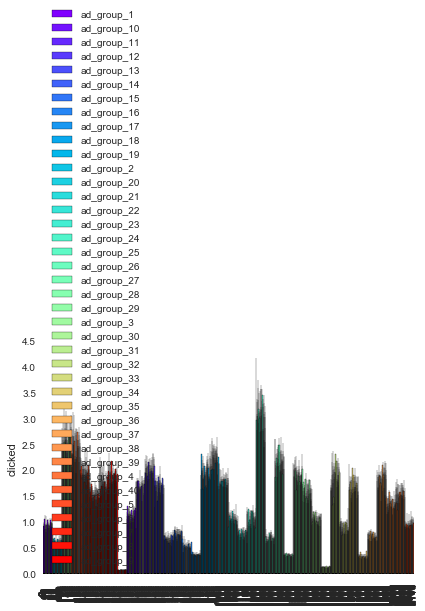

In [92]:
grouped_list = []
label_list = []
for label, key in by_ad['avg_cost_per_click']:
    grouped_list.append(key)
    label_list.append(label)
df_grouped_bar = pd.concat(grouped_list, axis=1).fillna(0)
df_grouped_bar.columns = label_list
ax = df_grouped_bar.plot(kind='bar', stacked=True, cmap=plt.cm.rainbow)

ax.set_xticklabels(df_grouped_bar.index.format())
plt.ylabel('clicked')
plt.tight_layout()
plt.show()

In [110]:
# print by_ad['avg_cost_per_click'].agg(np.mean)
by_ad = df.groupby(['ad_int'])

In [118]:
avg_click_dict = by_ad['avg_cost_per_click'].agg(np.mean)

## predict avg cost per click into the future (dec 15)


In [144]:
feature_cols = ['date_int','ad_int']
X=np.array(df[feature_cols]).reshape((2115,-1))
print X
y=df.avg_cost_per_click
lm=LinearRegression()
lm.fit(X,y)

[[ 1  1]
 [ 2  1]
 [ 3  1]
 ..., 
 [20 40]
 [21 40]
 [22 40]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Part 3 method
- if mean avg cost per click per ad group is less than the predicted value, the trend is decreasing. 
- if mean avg cost per click per ad group is equal to the predicted value, the trend is flat. 
- if mean avg cost per click per ad group is greater than the predicted value, the trend is increasing. 





In [145]:

decr_click=[]
flat_click=[]
incr_click=[]
for i in range(1,len(df.ad.unique())+1):
#     print "predicting ad shown on Dec 15 for ad group "+ str(i) 
    for k,v in avg_click_dict.iteritems():
        if i == k:
            if round(v) < round(lm.predict([15,i])[0]):
                decr_click.append(i)
            elif round(v) == round(lm.predict([15,i])[0]):
                flat_click.append(i)
            elif round(v) > round(lm.predict([15,i])[0]):
                incr_click.append(i)
                
print decr_click, "decreasing"
print flat_click, "flat"
print incr_click, "increasing"

[1, 2, 9, 17, 27, 31, 35] decreasing
[4, 5, 6, 10, 14, 15, 16, 21, 22, 23, 25, 30, 33, 36, 38, 40] flat
[3, 7, 8, 11, 12, 13, 18, 19, 20, 24, 26, 28, 29, 32, 34, 37, 39] increasing


/Users/jennxf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jennxf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jennxf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s